
# Visualizing Live FX Rates: Plotting Currency Data from FinFeedAPI

This beginner-friendly tutorial will teach you how to fetch **real-time currency data** from the [FinFeedAPI](https://docs.finfeedapi.com/currencies-api/rest-api-realtime/fx-realtime-rest-api) and display it in a **live-updating chart** using Python.

---



## Requirements

Make sure you have Python 3.8+ installed, and install these packages:

```bash
pip install requests matplotlib

```



## Step 1: Understand the API Endpoint

We'll use the FinFeedAPI Real-Time Currencies API endpoint:

**Endpoint:**
```
GET https://api-realtime.fx.finfeedapi.com/v1/exchangerate/:asset_id_base/:asset_id_quote
```

**Headers:**
```
X-APIBricks-Key: YOUR_API_KEY_HERE
```

Example response:
```json
{
    "time": "2025-10-22T12:31:21.9000000Z",
    "asset_id_base": "USD",
    "asset_id_quote": "EUR",
    "rate": 0.8631913623317651164477881965
}
```
---



## Step 2: Fetch Real-Time Data

We'll use Python's `requests` library to fetch USD/EUR rates.


In [ ]:

import requests

API_KEY = "YOUR_API_KEY_HERE"
URL = "https://api-realtime.fx.finfeedapi.com/v1/exchangerate/USD/EUR"

headers = {"X-APIBricks-Key": API_KEY}

response = requests.get(URL, headers=headers)
data = response.json()

data



## Step 3: Plot Real-Time FX Rates

In this step, we’ll create a single chart that will reflect the collected real-time USD/EUR exchange rates at a custom interval (for example, every 1 minute) over a defined duration (for example, 5 minutes).

You can easily change how long the chart runs and how often new data points are fetched — making it flexible for testing different update frequencies or timeframes.

The chart will automatically stop after the configured duration or when you manually interrupt the process (Ctrl + C).


⏳ Processing your data... This will take about 5 minute(s).
Fetching every 60 second(s) — please wait until the process completes.

[13:47:41] Data point 1/5 collected → Rate: 0.862479138785833
[13:48:42] Data point 2/5 collected → Rate: 0.8625684124572155
[13:49:43] Data point 3/5 collected → Rate: 0.8625064148914583
[13:50:43] Data point 4/5 collected → Rate: 0.8624543438231714
[13:51:44] Data point 5/5 collected → Rate: 0.8625126142469859

✅ Data collection complete! Generating your chart...


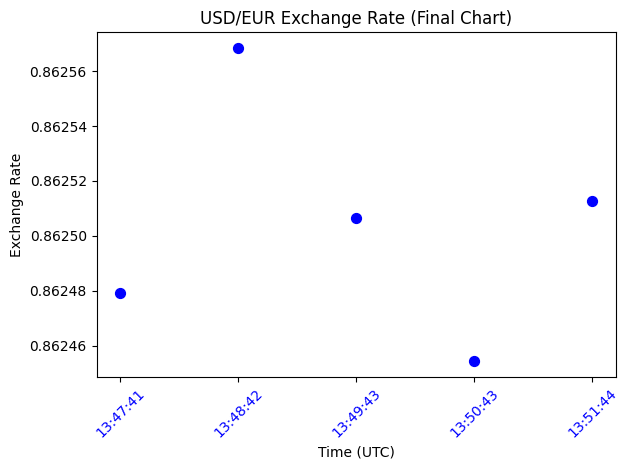

🎉 Done! Chart displayed above.


In [6]:
import requests
import time
from datetime import datetime, UTC
import matplotlib.pyplot as plt

# ====== USER CONFIGURATION ======
total_minutes = 5        # total duration to run (e.g., 5 minutes)
interval_seconds = 60    # how often to fetch new data (e.g., every 60 seconds)
# ================================

# --- Auto-calculated values (do not edit) ---
total_seconds = total_minutes * 60
num_iterations = int(total_seconds / interval_seconds)
# --------------------------------------------

timestamps = []  # time labels for X-axis
rates = []       # FX rate values for Y-axis

# Intro message for user clarity
print(f"⏳ Processing your data... This will take about {total_minutes} minute(s).")
print(f"Fetching every {interval_seconds} second(s) — please wait until the process completes.\n")

try:
    for i in range(num_iterations):
        response = requests.get(URL, headers=headers)
        data = response.json()
        rate = data.get("rate")
        current_time = datetime.now(UTC).strftime("%H:%M:%S")

        timestamps.append(current_time)
        rates.append(rate)

        print(f"[{current_time}] Data point {i+1}/{num_iterations} collected → Rate: {rate}")
        
        if i < num_iterations - 1:
            time.sleep(interval_seconds)  # wait before next fetch

    # Once all data is fetched, plot a single chart
    print("\n✅ Data collection complete! Generating your chart...")

    fig, ax = plt.subplots()
    ax.scatter(timestamps, rates, s=50, color="blue")
    ax.set_title("USD/EUR Exchange Rate (Final Chart)")
    ax.set_xlabel("Time (UTC)")
    ax.set_ylabel("Exchange Rate")
    plt.xticks(rotation=45)
    plt.setp(ax.get_xticklabels(), color="blue")
    plt.tight_layout()
    plt.show()

    print("🎉 Done! Chart displayed above.")

except KeyboardInterrupt:
    print("\n⏹️ Process stopped by user before completion.")



## Step 4: Optional Enhancements

Try changing the quote currency to plot different pairs, for example:
```python
URL = "https://api-realtime.fx.finfeedapi.com/v1/exchangerate/USD/JPY"
```



## ✅ You Did It!

You’ve successfully:
- Connected to the FinFeed Real-Time API
- Parsed live FX data
- Plotted it dynamically using Matplotlib

🎉 Congratulations on building your first **real-time currency chart!**
